# **Lab 6 Work**

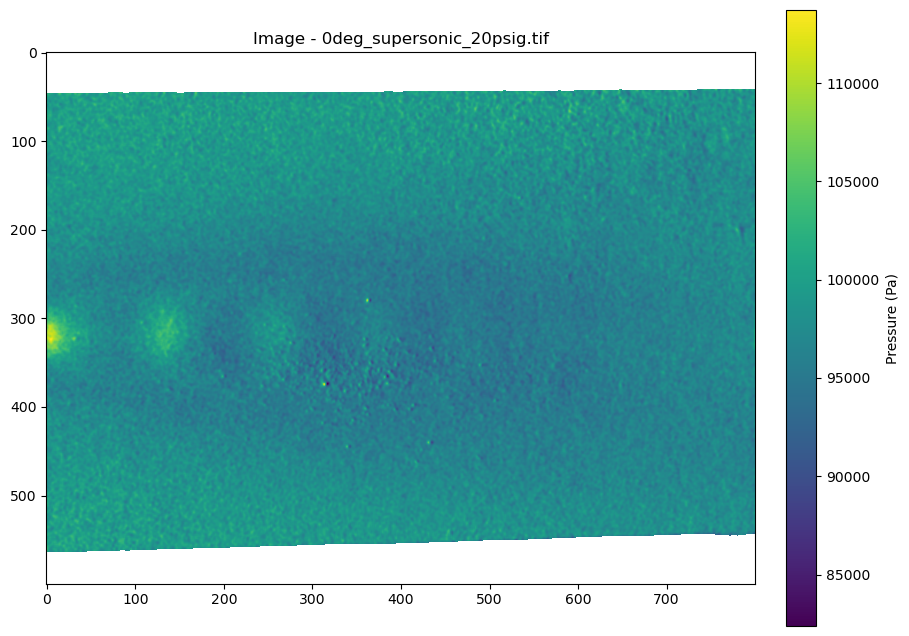

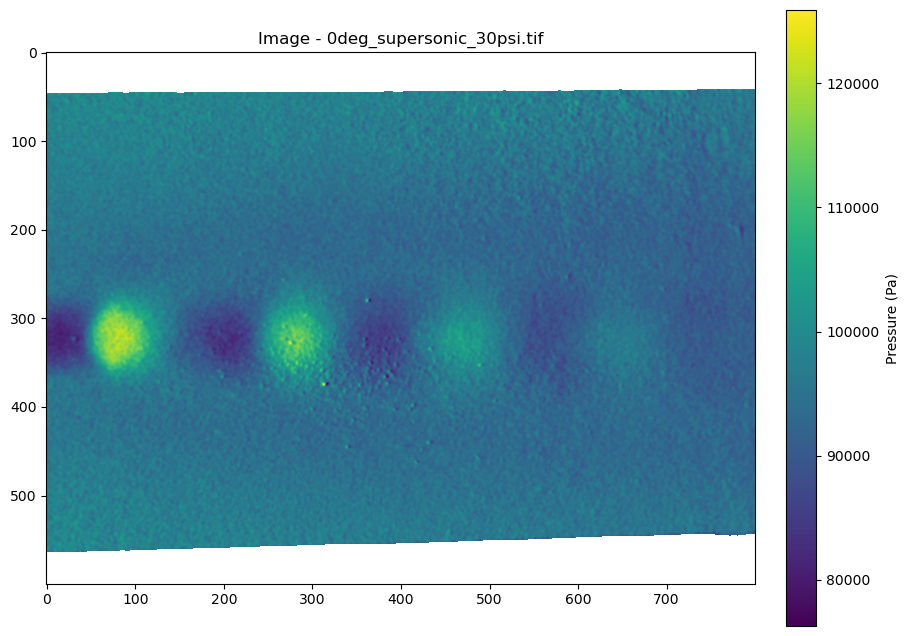

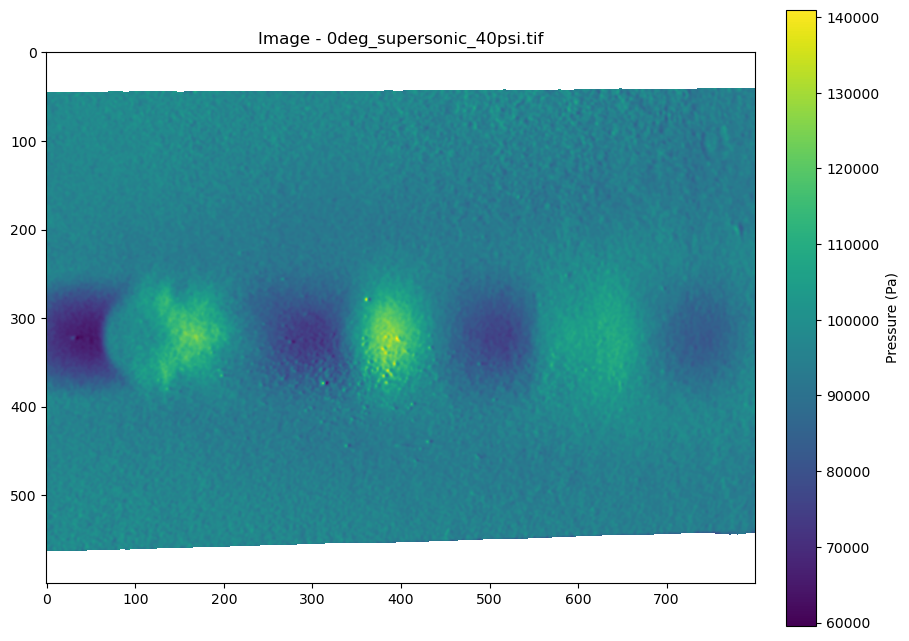

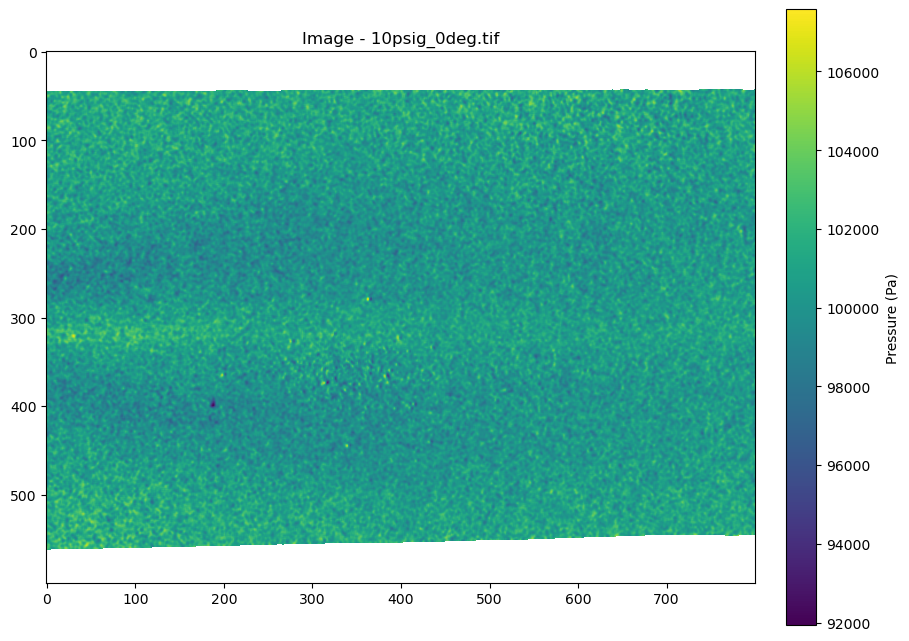

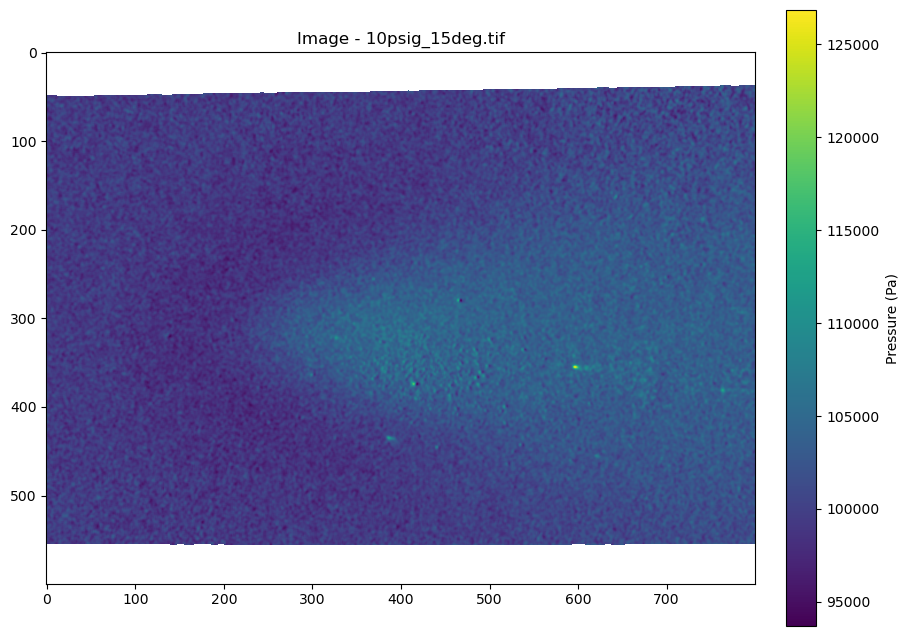

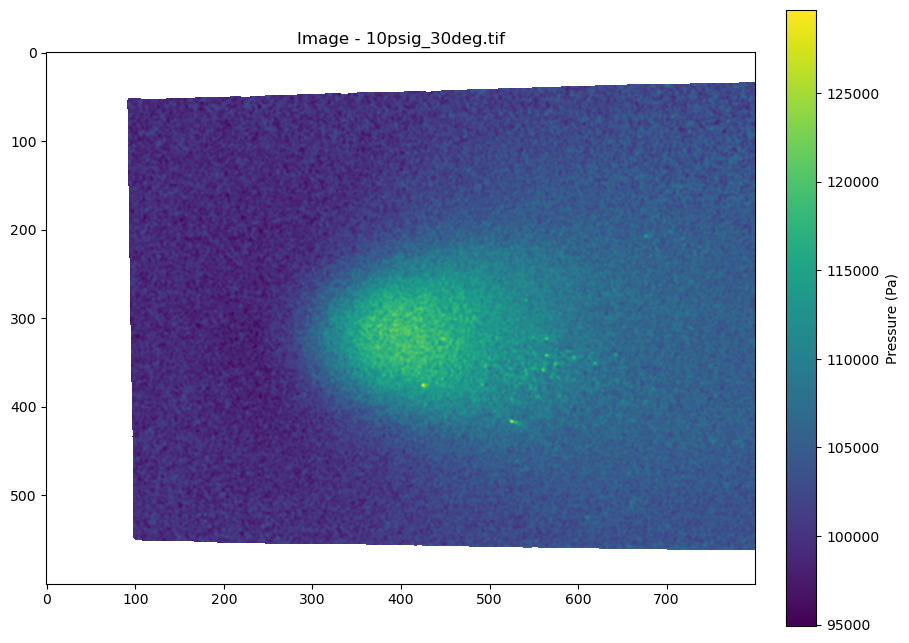

In [187]:
import os
import tifffile
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# Specify the folder path containing TIFF files
folder_path = 'Collected Images (Bad)'

# Get a list of all TIFF files in the folder
tif_files = [file for file in os.listdir(folder_path) if file.endswith('.tif')]

# Set the size for the plots
plot_size = (10, 8)

# Iterate over each TIFF file
for tif_file in tif_files:
    # Construct the full file path
    file_path = os.path.join(folder_path, tif_file)

    # Read the TIFF file
    image_data = tifffile.imread(file_path)

    # Plot the image using imshow
    plt.figure(figsize=plot_size)
    im = plt.imshow(image_data, cmap='viridis')
    plt.title(f'Image - {tif_file}')

    # Add colorbar
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label('Pressure (Pa)')

    plt.show()

    # Plot a specific row using plotly
    row_values = image_data[319, :]  # Assuming you want to plot row 320
    fig_line = px.line(x=np.arange(len(row_values)), y=row_values, labels={'x': 'Pixel', 'y': 'Pixel Value'})
    fig_line.update_layout(title=f'Plot of Row 320 - {tif_file}', xaxis_title='Pixel', yaxis_title='Pressure (Pa)')

    # Add hover text to display the value of the point
    fig_line.update_traces(hoverinfo='text', text=[f'Value: {val}' for val in row_values])
      
    # Display the plot with a larger size
    fig_line.show(figsize=plot_size)


## Task 2

Plot the processed pressure fields as non-dimensionalized pressure coefficient (Cp)

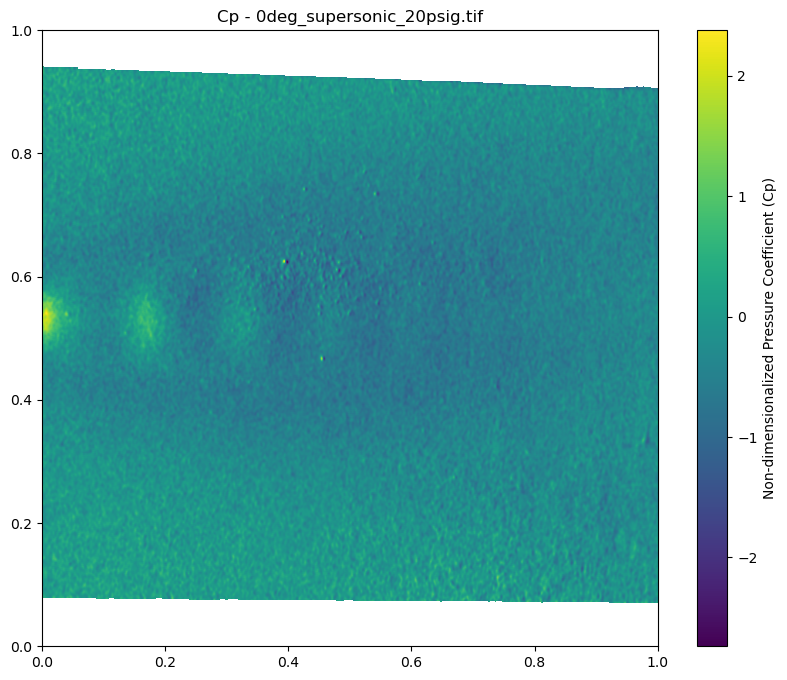

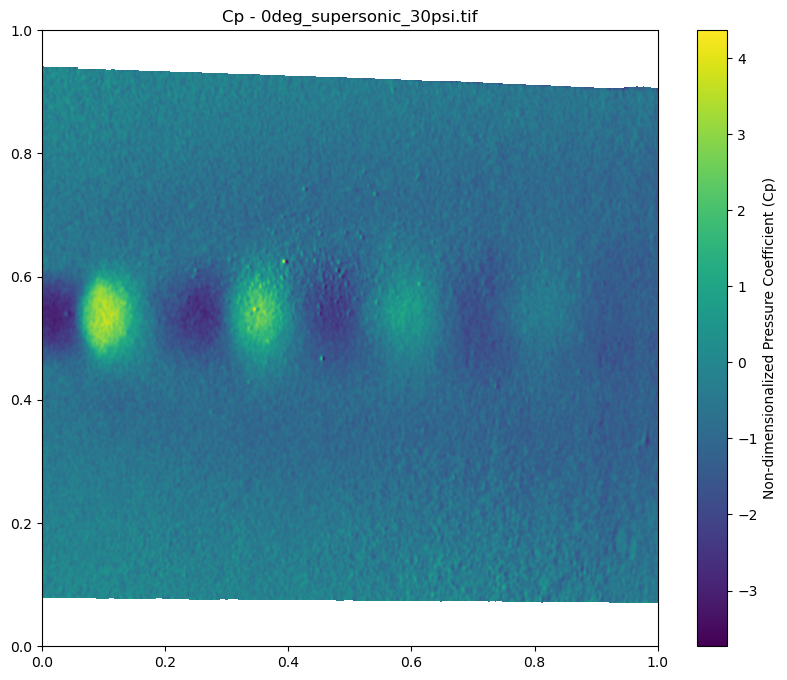

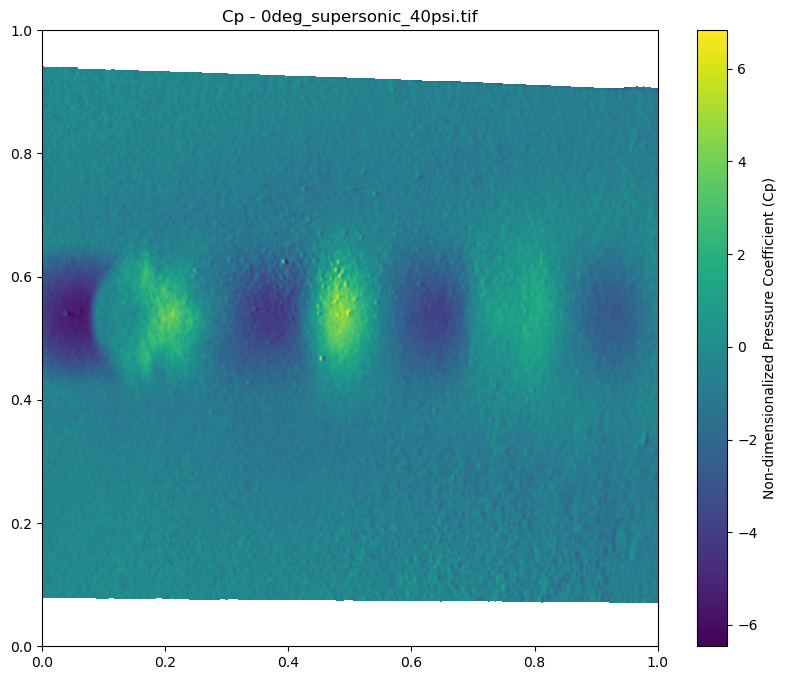

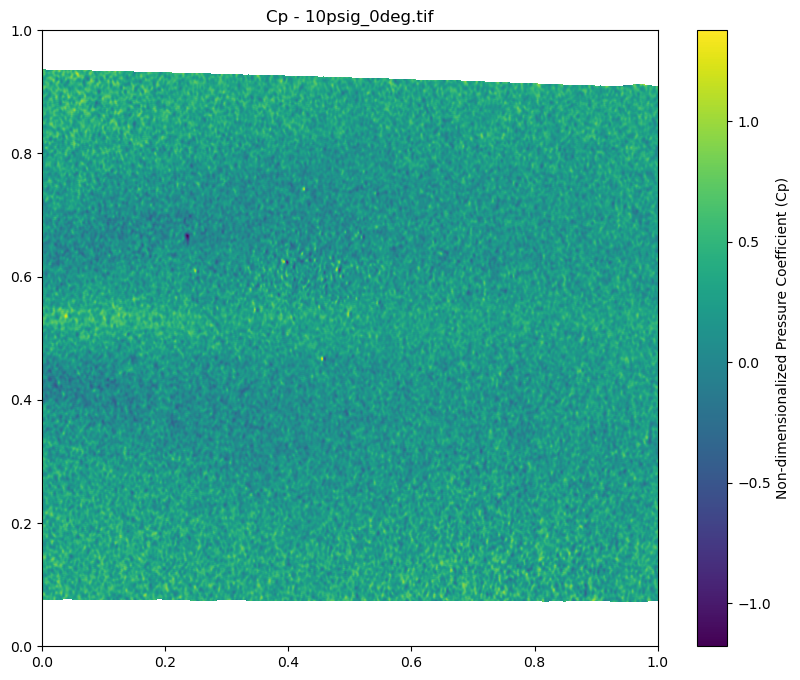

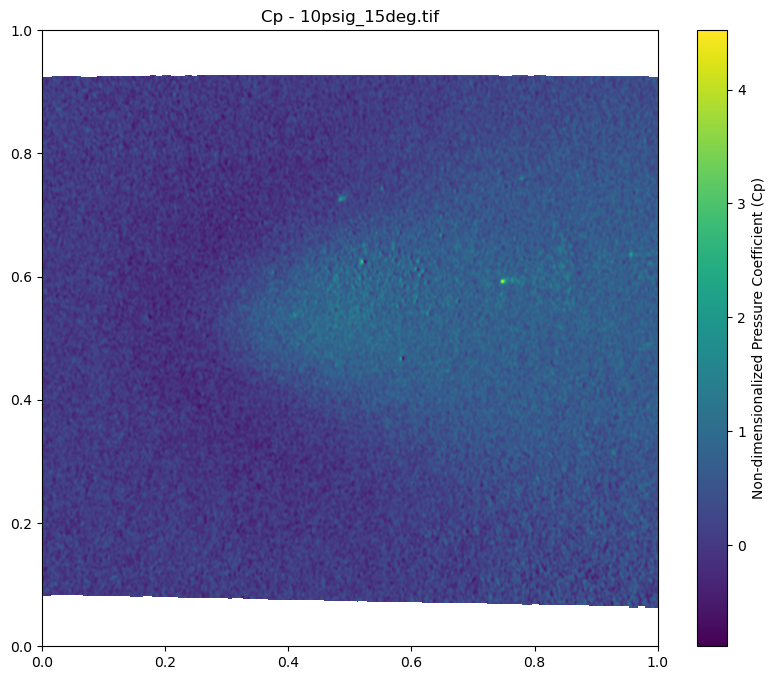

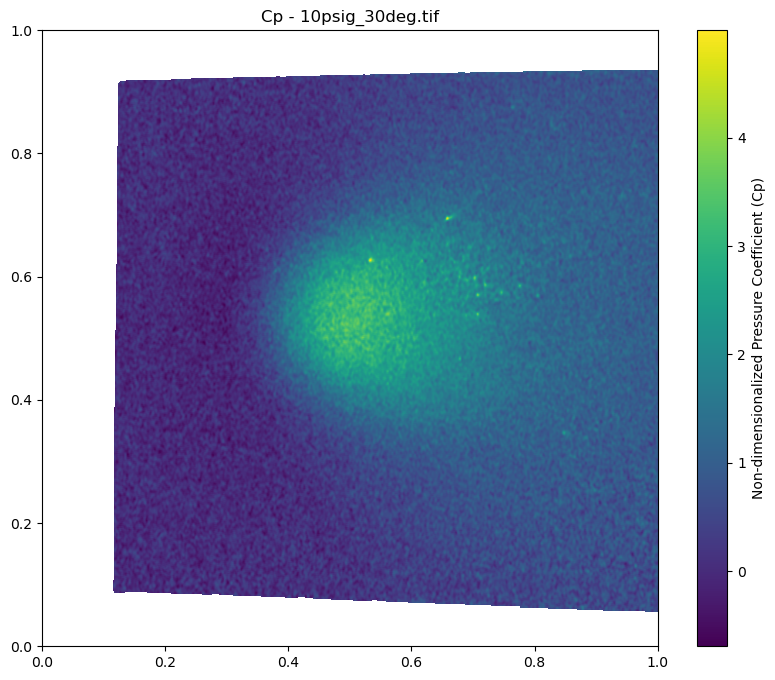

In [210]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt

# Specify the folder path containing TIFF files
folder_path = 'Collected Images (Bad)'

# Get a list of all TIFF files in the folder
tif_files = [file for file in os.listdir(folder_path) if file.endswith('.tif')]

# Set the size for the plots
plot_size = (10, 8)

# Define constants for non-dimensionalization
pref = 99153.46  # Pa; 29.28 inHg 
rho = 1.225      # Density of air (kg/m^3)
uref = 100       # Reference velocity (m/s)

# Iterate over each TIFF file
for tif_file in tif_files:
    # Construct the full file path
    file_path = os.path.join(folder_path, tif_file)

    # Read the TIFF file
    image_data = tifffile.imread(file_path)

    # Convert pressure to non-dimensionalized pressure coefficient (Cp)
    cp_field = (image_data - pref) / (0.5 * rho * uref**2)

    # Plot the non-dimensionalized pressure coefficient (Cp) as a heatmap
    plt.figure(figsize=plot_size)
    plt.imshow(cp_field, cmap='viridis', origin='lower', extent=(0, 1, 0, 1))
    plt.colorbar(label='Non-dimensionalized Pressure Coefficient (Cp)')
    plt.title(f'Cp - {tif_file}')
    plt.show()



## Task 3

Plot a pressure profile down the centerline of each processed image to compare the
pressure along the plate at the various conditions. Plot all of the pressure profiles for
each test configuration on a single plot with a clear legend and axes labelling.

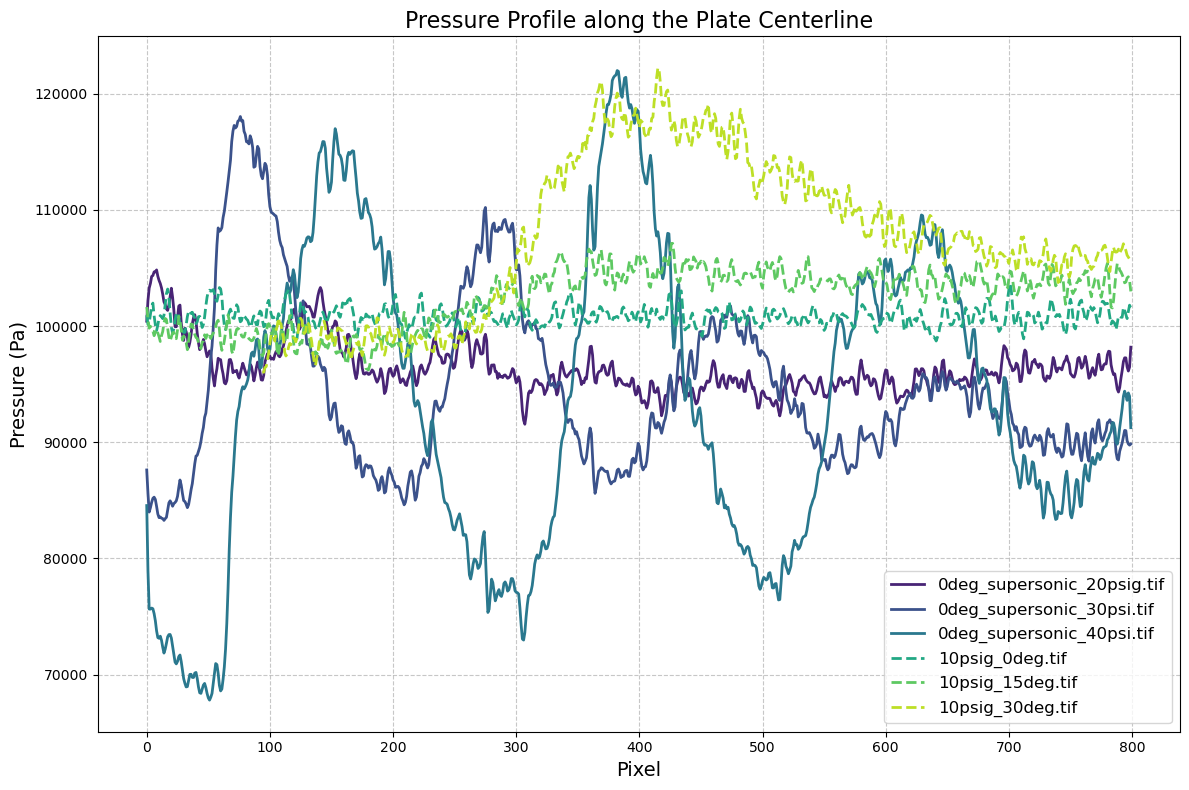

In [184]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

# Specify the folder path containing TIFF files
folder_path = 'Collected Images (Bad)'

# Get a list of all TIFF files in the folder
tif_files = [file for file in os.listdir(folder_path) if file.endswith('.tif')]

# Lists to store results
pressure_profiles = []
tif_names = []

# Define a set of distinct colors for each line
line_colors = [cm.viridis(i) for i in [0.1, 0.25, 0.4, 0.6, 0.75, 0.9]]

# Iterate over each TIFF file
for tif_file, color in zip(tif_files, line_colors):
    # Construct the full file path
    file_path = os.path.join(folder_path, tif_file)

    # Read the TIFF file
    image_data = tifffile.imread(file_path)

    # Get the pressure profile along the centerline
    centerline_index = image_data.shape[0] // 2
    pressure_profile = image_data[centerline_index, :]

    # Store results in lists
    tif_names.append(tif_file)
    pressure_profiles.append(pressure_profile)

# Plot all pressure profiles on a single plot
plt.figure(figsize=(12, 8))

for tif_name, pressure_profile, color in zip(tif_names, pressure_profiles, line_colors):
    # Check if the TIFF file name contains "supersonic" and adjust line style
    line_style = '-' if 'supersonic' in tif_name else '--'
    
    plt.plot(pressure_profile, label=tif_name, linewidth=2, linestyle=line_style, color=color)

plt.title('Pressure Profile along the Plate Centerline', fontsize=16)
plt.xlabel('Pixel', fontsize=14)
plt.ylabel('Pressure (Pa)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


## Task 5

For the supersonic jet study, determine the shock cell spacing and calculate the shock
wave angle in the jet plume based on the pressure rise (p2/p1) generated across the shock
waves

In [216]:
# Shock spacing
spacing_20psi = 129 - 6 # Pixels
spacing_30psi = 280 - 81 # Pixels
spacing_40psi = 389 - 158 # Pixels[

scale_factor = 39.37 * 130 # Jet is 1 inch high which correlates to approximately 130 pixels; 39.37 inches per meter

spacing_20psi_scaled = spacing_20psi / scale_factor
spacing_30psi_scaled = spacing_30psi / scale_factor
spacing_40psi_scaled = spacing_40psi / scale_factor

print(spacing_20psi_scaled, spacing_30psi_scaled, spacing_40psi_scaled)

# Shock angle
jet_height = 1 / 39.37 # Nozzle size in meters
angle_20psi = (.5 * np.arctan(spacing_20psi_scaled / jet_height)) * 180 / (2 * np.pi) # Deg
angle_30psi = (.5 * np.arctan(spacing_30psi_scaled / jet_height)) * 180 / (2 * np.pi) # Deg
angle_40psi = (.5 * np.arctan(spacing_40psi_scaled / jet_height)) * 180 / (2 * np.pi) # Deg

print(angle_20psi, angle_30psi, angle_40psi)

# Creating a DataFrame with column names
task5_df = pd.DataFrame([
    [spacing_20psi_scaled * 100, angle_20psi],
    [spacing_30psi_scaled  * 100, angle_30psi],
    [spacing_40psi_scaled * 100, angle_40psi]
], columns=["Mach Diamond Distance (cm)", "Mach Angle (Deg)"])

task5_df

0.02403235575701921 0.03888161622477092 0.045133936421719
10.85378640173737 14.211191672404036 15.157617934754992


Mach Diamond Distance (cm)  Mach Angle (Deg)
0                    2.403236         10.853786
1                    3.888162         14.211192
2                    4.513394         15.157618

## Task 6

Compute the surface pressure force acting on the plate for all conditions and plot the
results (vs. angle or NPR) assuming the back side of the plate is under constant
atmospheric pressure. Assume the total area for the pressure measurement is A = 15 in2
or 0.01m2

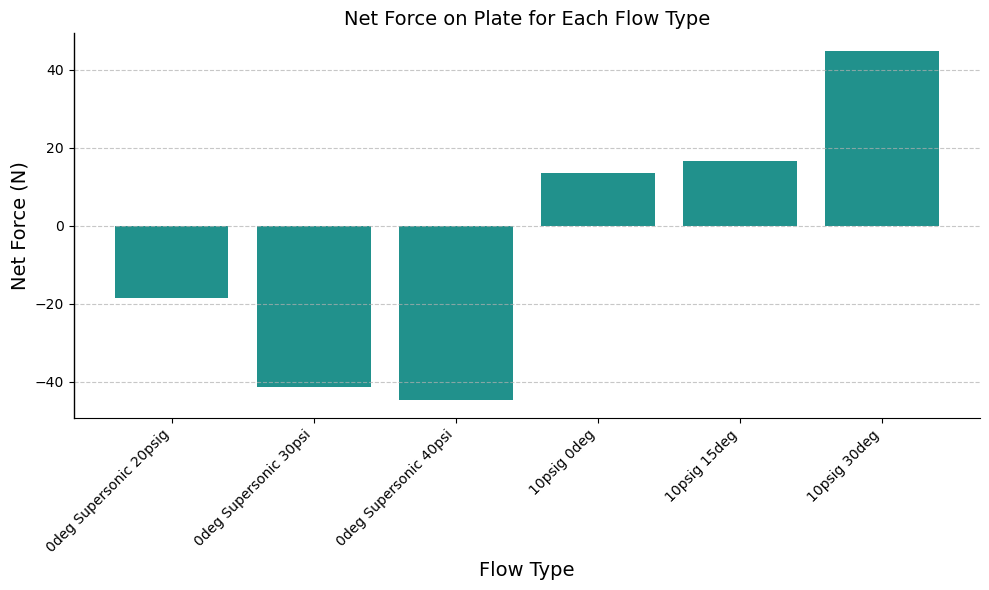

In [186]:
import os
import tifffile
import pandas as pd
import matplotlib.pyplot as plt

# Specify the folder path containing TIFF files
folder_path = 'Collected Images (Bad)'

# Get a list of all TIFF files in the folder
tif_files = [file for file in os.listdir(folder_path) if file.endswith('.tif')]

# Define constants
area = 0.01  # M2
pAtm = 99153.46  # Pa; 29.28 inHg

# Lists to store results
formatted_names = []
net_forces = []

# Iterate over each TIFF file
for tif_file in tif_files:
    # Construct the full file path
    file_path = os.path.join(folder_path, tif_file)

    # Read the TIFF file
    image_data = tifffile.imread(file_path)

    # Calculate net force
    avg_flow_pressure = pd.DataFrame(image_data).mean().mean()
    net_pressure = avg_flow_pressure - pAtm
    net_force = net_pressure * area

    # Remove ".tif" extension from the file name
    tif_name = os.path.splitext(tif_file)[0]

    # Replace underscores with spaces and capitalize the first letter of each word
    formatted_name = ' '.join(word.capitalize() for word in tif_name.split('_'))

    # Store results in lists
    formatted_names.append(formatted_name)
    net_forces.append(net_force)

# Plot the results with a white background and gridlines
plt.figure(figsize=(10, 6))
bars = plt.bar(formatted_names, net_forces, color = cm.viridis(.5))
plt.xlabel('Flow Type', fontsize = 14)
plt.ylabel('Net Force (N)', fontsize = 14)
plt.title('Net Force on Plate for Each Flow Type', fontsize = 14)
plt.xticks(rotation=45, ha='right')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove right, top, and bottom spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)

# Show only left spine
ax.spines['left'].set_linewidth(1)  # Optional: Adjust the linewidth of the left spine

plt.tight_layout()
plt.show()
